linear aggression

In [2]:
import pandas as pd
import numpy as np

import csv file

In [3]:
adv=pd.read_csv("tvmarketing.csv")

first 5 rows

In [4]:
adv.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


last 5 rows

In [5]:
adv.tail()

,TV,Sales
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5
199,232.1,13.4


info

In [6]:
adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


column and rows

In [10]:
adv.shape

(200, 2)

correlation

In [7]:
adv.corr()

,TV,Sales
TV,1.000000,0.782224
Sales,0.782224,1.000000


decribe

In [12]:
adv.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


vissualization

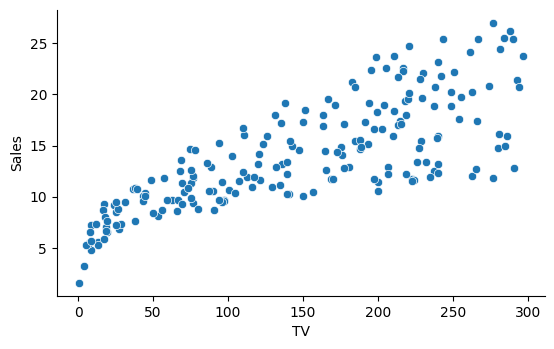

In [8]:
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
sns.pairplot(adv, x_vars=['TV'], y_vars=['Sales'], size=3.5, height=5, aspect=1.6, kind='scatter')


preparing X and Y

In [4]:
x=adv['TV']
y=adv['Sales']

In [23]:
x.head()

0    230.1
1     44.5
2     17.2
3    151.5
4    180.8
Name: TV, dtype: float64

In [32]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

split in to train test

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7)

In [25]:
x_train.tail()

4      180.8
96     197.6
165    234.5
144     96.2
6       57.5
Name: TV, dtype: float64

In [26]:
y_train[:5]

188    15.9
63     14.0
163    18.0
115    12.6
13      9.7
Name: Sales, dtype: float64

In [27]:
len(x_train), len(x_test), len(y_train), len(y_test)

(140, 60, 140, 60)

In [28]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(140,) (140,) (60,) (60,)


In [11]:
x_train.ndim

1

In [31]:
x_train

188    286.0
63     102.7
163    163.5
115     75.1
13      97.5
       ...  
4      180.8
96     197.6
165    234.5
144     96.2
6       57.5
Name: TV, Length: 140, dtype: float64

change shape of x :

In [6]:
x_train = np.reshape(x_train,(-1, 1))
x_test = np.reshape(x_test, (-1, 1))

In [34]:
x_train.shape

(140, 1)

In [35]:
x_train.ndim

2

In [36]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(140, 1) (140,) (60, 1) (60,)


In [7]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [8]:
print(lr.coef_)
print(lr.intercept_)

[0.04981501]
6.827984449900227


In [9]:
y_pred = lr.predict(x_test)

In [16]:
y_pred.shape

(60,)

In [17]:
y_pred[:5]

array([10.64656144, 14.82257208,  7.05832073, 17.832523  , 12.52363319])

In [43]:
y_test[:5]

59     18.4
71     12.4
136     9.5
121     7.0
89     16.7
Name: Sales, dtype: float64

In [10]:
sales_predicted = lr.predict([[44.5]])
sales_predicted

array([9.04475257])

In [11]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mse


9.819277802851387

In [12]:
from sklearn.metrics import r2_score
r_squared = r2_score(y_test, y_pred)
r_squared

0.557374447284468

In [13]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2.495702687911235
Mean Squared Error: 9.819277802851387
Root Mean Squared Error: 3.133572689894298


Text(0.5, 0, 'Index')

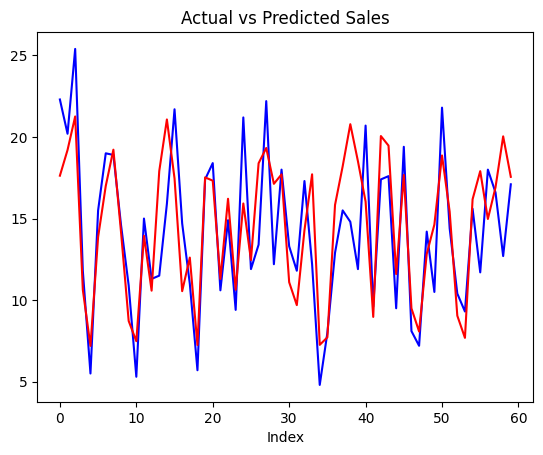

In [14]:
import matplotlib.pyplot as plt
c=[i for i in range(len(y_test))]
plt.plot(c, y_test, color='blue', label='Actual Sales')
plt.plot(c, y_pred, color='red', label='Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Index')